In [0]:
import cv2

In [0]:
# from pyimagesearch.transform import four_point_transform
from skimage.filters import threshold_local
import numpy as np
# import argparse
import cv2
import imutils
import matplotlib.pyplot as plt

In [0]:
image=cv2.imread('img2.jpeg')

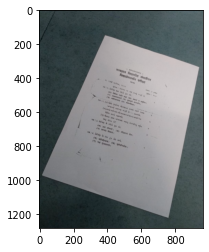

In [38]:
plt.imshow(image)

In [0]:
ratio=image.shape[0]/500
orig=image.copy()
image=imutils.resize(orig,height=500)

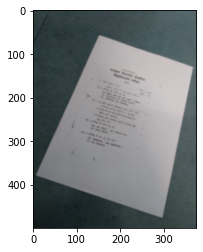

In [40]:
# gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
gray=cv2.GaussianBlur(image,(5,5),0)
plt.imshow(gray)

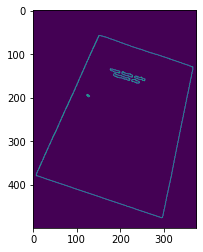

In [41]:
edged=cv2.Canny(gray,75,200)
plt.imshow(edged)


# contours

In [0]:
cnts=cv2.findContours(edged.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)
cnts=sorted(cnts,key=cv2.contourArea,reverse=True)[:5]

In [43]:
for c in cnts:
  peri=cv2.arcLength(c,True)
  approx=cv2.approxPolyDP(c,0.02*peri,True)
  if len(approx)==4:
    screenCnt = approx
    break

ERROR! Session/line number was not unique in database. History logging moved to new session 63


In [0]:
# for c in cnts:
#   peri = cv2.arcLength(c, True)
# 	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
# 	# if our approximated contour has four points, then we
# 	# can assume that we have found our screen
# 	if len(approx) == 4:
# 		screenCnt = approx
# 		break

In [45]:
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)

array([[[ 51,  67,  66],
        [ 49,  65,  64],
        [ 46,  62,  61],
        ...,
        [ 81, 101, 102],
        [ 84, 104, 105],
        [ 85, 106, 107]],

       [[ 49,  65,  64],
        [ 47,  63,  62],
        [ 46,  62,  61],
        ...,
        [ 84, 104, 105],
        [ 83, 104, 105],
        [ 84, 105, 106]],

       [[ 48,  64,  63],
        [ 49,  65,  64],
        [ 48,  64,  63],
        ...,
        [ 84, 104, 105],
        [ 83, 103, 104],
        [ 88, 109, 110]],

       ...,

       [[ 20,  30,  30],
        [ 22,  32,  32],
        [ 20,  30,  30],
        ...,
        [ 63,  78,  80],
        [ 60,  74,  79],
        [ 64,  79,  86]],

       [[ 21,  31,  31],
        [ 22,  32,  32],
        [ 19,  29,  29],
        ...,
        [ 60,  75,  78],
        [ 63,  77,  82],
        [ 60,  75,  83]],

       [[ 19,  30,  30],
        [ 18,  30,  30],
        [ 14,  26,  26],
        ...,
        [ 61,  76,  79],
        [ 62,  76,  82],
        [ 62,  77,  86]]

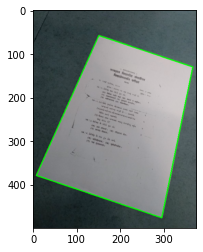

In [46]:
plt.imshow(image)

In [0]:
# import the necessary packages
import numpy as np

def order_points(pts):
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

In [0]:
def four_point_transform(image, pts):
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

In [0]:
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)

In [0]:
warp = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)
T = threshold_local(warp, 11, offset = 10, method = "gaussian")
warp = (warp > T).astype("uint8") * 255

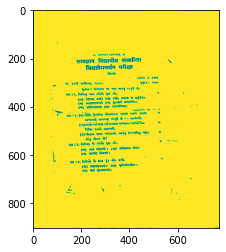

In [57]:
plt.imshow(warp)